In [443]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [444]:
data = pd.read_csv('McGill VT Data Test Results.csv')

/opt/anaconda3/envs/ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0,2,3,4,5,7,8,9,10,12,13,14,15,17,18,19,20,22,23,24,25,27,28,29,30,32,33,34,35,37,38,39,40,42,43,44,45,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [445]:
# Drop first row
data.drop(index=data.index[0], 
        axis=0, 
        inplace=True)

data.head()

,Time,Unnamed: 1,SpringBracketStiff+-100Hz-70V-V,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,SpringBracket-100Hz-70V-V5-33,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
1,0,NaN,0.022595,0,0,4.80674E-06,NaN,-0.01292,0,0,...,1.40423E-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.00E-05,NaN,-0.042562,1.99E-14,1.99341E-14,NaN,NaN,-0.021374,5.88039E-14,5.88039E-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.00E-05,NaN,-0.099184,1.0046E-12,1.02453E-12,NaN,NaN,-0.092474,6.48068E-13,7.06872E-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.00E-05,NaN,-0.0933,1.8525E-12,2.87703E-12,NaN,NaN,-0.086509,1.60175E-12,2.30862E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8.00E-05,NaN,-0.049633,1.02149E-12,3.89853E-12,NaN,NaN,-0.1185,2.10143E-12,4.41005E-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [446]:
for cnt,value in enumerate(data.columns):
#     print(cnt,value,'Unnamed' in value or 'Micro' in value or 'V5-33' in value)
    if (cnt > 0):
        if ('Unnamed' in value or 'Base+Micro-100Hz-70V-V5-44' in value or 'V5-33' in value): data.drop(value, axis=1, inplace=True)

# Drop last column
data.dropna(inplace=True)

# Change string to float
data = data.astype(float)

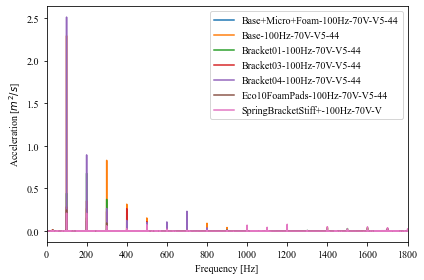

In [447]:
N = data['Time'].shape[0]

legstr = []
for cnt,value in enumerate(data.columns[::-1]):
    if ('Time' not in value ):
        y = data[value]
        yf = np.fft.fft(y)
        yz = 2.0/N * np.abs(yf[:N//2])
        freq = np.fft.rfftfreq(y.shape[0], d=1/50e3)
        plt.plot(freq[:-1], yz)
        legstr.append(value)

plt.xlim([0,1800])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Acceleration [$m^2/s$]')
plt.legend(legstr)
plt.tight_layout()
plt.rcParams["font.family"] = "Times New Roman"
plt.savefig('FFT,.jpg',dpi=300)

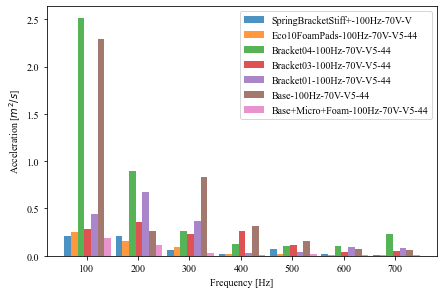

In [448]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx],idx

out_data_list = []
bar_width = 0
bar_width_add = 0.13
opacity = 0.8
index = np.arange(len(a))
a = np.arange(100,800,100)
plt.figure(1)
for cnt,value in enumerate(data.columns):
#     if ('Time' not in value and ('Eco' in value or 'Base' in value or 'Spring' in value) ):
    if ('Time' not in value):
        y = data[value]
        yf = np.fft.fft(y)
        yz = 2.0/N * np.abs(yf[:N//2])
        freq = np.fft.rfftfreq(y.shape[0], d=1/50e3)
        x = freq[:-1]
        bar_data = []
        for cnt1,value1 in enumerate(a):
            [i,j] = find_nearest(x,value1)
#             print(cnt,value,cnt1,value1,i,j,yz[j])
            bar_data.append(yz[j])
        bar_width += bar_width_add
        plt.bar(index+bar_width,bar_data,bar_width_add,alpha=opacity,label=value)
        plt.tight_layout()
        out_data_list.append(bar_data)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Acceleration [$m^2/s$]')
plt.xticks(index + 0.5, ('100','200','300','400','500','600','700'))
plt.savefig('FFT_bar.jpg',dpi=300)

In [449]:
out_data_df = pd.DataFrame(out_data_list,columns=data.columns[1:])
out_data_df.to_csv('FFTdata.csv')
data.head()

,Time,SpringBracketStiff+-100Hz-70V-V,Eco10FoamPads-100Hz-70V-V5-44,Bracket04-100Hz-70V-V5-44,Bracket03-100Hz-70V-V5-44,Bracket01-100Hz-70V-V5-44,Base-100Hz-70V-V5-44,Base+Micro+Foam-100Hz-70V-V5-44
1,0.00000,0.022595,-0.479467,2.586843,-0.096254,-1.128463,-2.133309,0.096591
2,0.00002,-0.042562,-0.480188,2.664909,-0.152388,-1.277536,-2.308164,0.086939
3,0.00004,-0.099184,-0.385981,2.755430,-0.214033,-1.390583,-2.356436,0.068379
4,0.00006,-0.093300,-0.276958,2.784863,-0.223581,-1.380814,-2.253461,0.081008
5,0.00008,-0.049633,-0.245525,2.738870,-0.231872,-1.375093,-2.153799,0.069833
